# 線形回帰モデルとニューラルネットワークの比較

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
print("説明変数")
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
print(df_data.shape)
display(df_data.head())

print("目的変数")
display(boston.target[:10])

説明変数
(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


目的変数


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.40,-0.06,0.42,-0.22,0.35,-0.38,0.62,0.58,0.29,-0.38,0.45,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.40,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.62,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


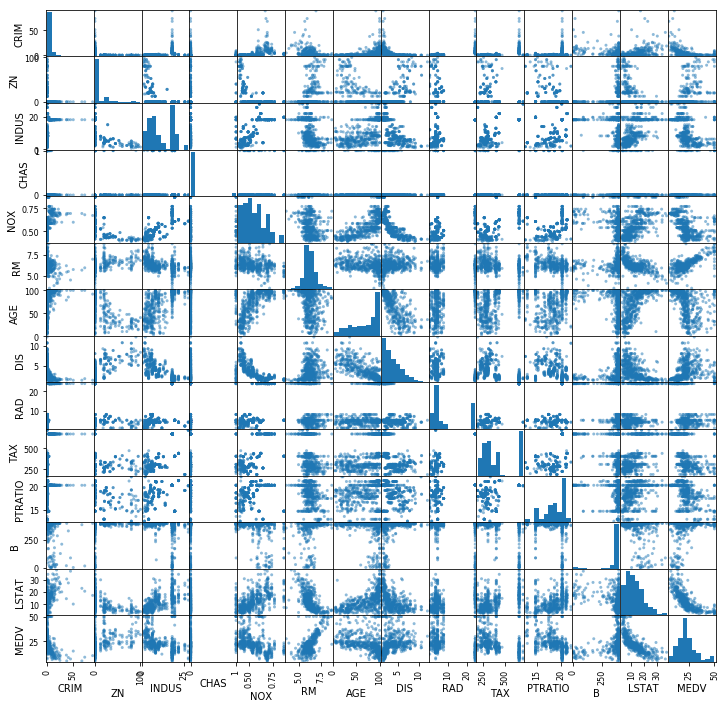

In [4]:
df = pd.concat([df_data, pd.DataFrame(boston.target, columns=["MEDV"])], axis=1)
display(df.corr().round(2))
pd.plotting.scatter_matrix(df, figsize=(12,12))
plt.show()

### データセット

In [5]:
X = df_data[["LSTAT"]].as_matrix()
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,test_size=0.3,  random_state=1234)

# 標準化
std = StandardScaler()
X_train= std.fit_transform(X_train)
X_test = std.transform(X_test)
std = StandardScaler()
y_train = std.fit_transform(y_train.reshape(-1, 1)).reshape(1, -1)[0]
y_test = std.transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

### 線形回帰でモデリングする

In [14]:
# 学習
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

MSE= 0.4987617444520942
切片= 8.39593395566766e-17 回帰係数= [-0.73177683]


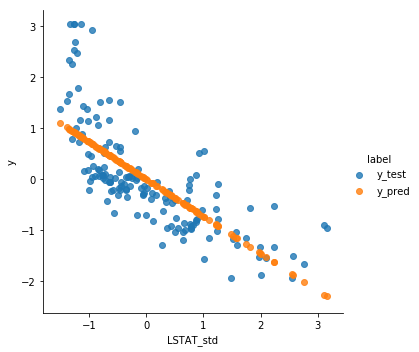

In [15]:
# 予測
y_pred =reg.predict(X_test)
df_result = pd.DataFrame(y_pred, columns=["linearRegression"])
print("MSE=",mean_squared_error(y_test, y_pred))
print("切片=", reg.intercept_, "回帰係数=", reg.coef_)

# 予測結果の描画
df1 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df1["y"] = y_test
df1["label"] = "y_test"
df2 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df2["y"] = y_pred
df2["label"] = "y_pred"
df = pd.concat([df1, df2], axis=0)

sns.lmplot(x="LSTAT_std", y="y", hue="label", data=df, fit_reg=False)
plt.show()

### ニューラルネットワークでモデリングする

In [16]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Train on 354 samples, validate on 152 samples
Epoch 1/200
354/354 [==============================] - 1s 2ms/step - loss: 1.1913 - mean_squared_error: 1.1913 - val_loss: 0.6210 - val_mean_squared_error: 0.6210
Epoch 2/200
354/354 [==============================] - 0s 74us/step - loss: 0.4944 - mean_squared_error: 0.4944 - val_loss: 0.5000 - val_mean_squared_error: 0.5000
Epoch 3/200
354/354 [================

354/354 [==============================] - 0s 77us/step - loss: 0.4677 - mean_squared_error: 0.4677 - val_loss: 0.5087 - val_mean_squared_error: 0.5087
Epoch 47/200
354/354 [==============================] - 0s 83us/step - loss: 0.4682 - mean_squared_error: 0.4682 - val_loss: 0.5357 - val_mean_squared_error: 0.5357
Epoch 48/200
354/354 [==============================] - 0s 74us/step - loss: 0.4900 - mean_squared_error: 0.4900 - val_loss: 0.5010 - val_mean_squared_error: 0.5010
Epoch 49/200
354/354 [==============================] - 0s 70us/step - loss: 0.4691 - mean_squared_error: 0.4691 - val_loss: 0.5017 - val_mean_squared_error: 0.5017
Epoch 50/200
354/354 [==============================] - 0s 79us/step - loss: 0.4667 - mean_squared_error: 0.4667 - val_loss: 0.5000 - val_mean_squared_error: 0.5000
Epoch 51/200
354/354 [==============================] - 0s 85us/step - loss: 0.4671 - mean_squared_error: 0.4671 - val_loss: 0.5007 - val_mean_squared_error: 0.5007
Epoch 52/200
354/354 [=

Epoch 96/200
354/354 [==============================] - 0s 115us/step - loss: 0.4695 - mean_squared_error: 0.4695 - val_loss: 0.5509 - val_mean_squared_error: 0.5509
Epoch 97/200
354/354 [==============================] - 0s 106us/step - loss: 0.4784 - mean_squared_error: 0.4784 - val_loss: 0.5029 - val_mean_squared_error: 0.5029
Epoch 98/200
354/354 [==============================] - 0s 114us/step - loss: 0.4692 - mean_squared_error: 0.4692 - val_loss: 0.5049 - val_mean_squared_error: 0.5049
Epoch 99/200
354/354 [==============================] - 0s 92us/step - loss: 0.4697 - mean_squared_error: 0.4697 - val_loss: 0.4985 - val_mean_squared_error: 0.4985
Epoch 100/200
354/354 [==============================] - 0s 88us/step - loss: 0.4667 - mean_squared_error: 0.4667 - val_loss: 0.5070 - val_mean_squared_error: 0.5070
Epoch 101/200
354/354 [==============================] - 0s 88us/step - loss: 0.4711 - mean_squared_error: 0.4711 - val_loss: 0.5300 - val_mean_squared_error: 0.5300
Epoch

354/354 [==============================] - 0s 77us/step - loss: 0.4706 - mean_squared_error: 0.4706 - val_loss: 0.5690 - val_mean_squared_error: 0.5690
Epoch 146/200
354/354 [==============================] - 0s 79us/step - loss: 0.4903 - mean_squared_error: 0.4903 - val_loss: 0.5127 - val_mean_squared_error: 0.5127
Epoch 147/200
354/354 [==============================] - 0s 77us/step - loss: 0.4729 - mean_squared_error: 0.4729 - val_loss: 0.5019 - val_mean_squared_error: 0.5019
Epoch 148/200
354/354 [==============================] - 0s 62us/step - loss: 0.4668 - mean_squared_error: 0.4668 - val_loss: 0.4991 - val_mean_squared_error: 0.4991
Epoch 149/200
354/354 [==============================] - 0s 69us/step - loss: 0.4677 - mean_squared_error: 0.4677 - val_loss: 0.4984 - val_mean_squared_error: 0.4984
Epoch 150/200
354/354 [==============================] - 0s 66us/step - loss: 0.4682 - mean_squared_error: 0.4682 - val_loss: 0.5008 - val_mean_squared_error: 0.5008
Epoch 151/200
354/

354/354 [==============================] - 0s 65us/step - loss: 0.4702 - mean_squared_error: 0.4702 - val_loss: 0.5110 - val_mean_squared_error: 0.5110
Epoch 195/200
354/354 [==============================] - 0s 79us/step - loss: 0.4698 - mean_squared_error: 0.4698 - val_loss: 0.5003 - val_mean_squared_error: 0.5003
Epoch 196/200
354/354 [==============================] - 0s 80us/step - loss: 0.4695 - mean_squared_error: 0.4695 - val_loss: 0.5125 - val_mean_squared_error: 0.5125
Epoch 197/200
354/354 [==============================] - 0s 66us/step - loss: 0.4706 - mean_squared_error: 0.4706 - val_loss: 0.4988 - val_mean_squared_error: 0.4988
Epoch 198/200
354/354 [==============================] - 0s 61us/step - loss: 0.4681 - mean_squared_error: 0.4681 - val_loss: 0.5045 - val_mean_squared_error: 0.5045
Epoch 199/200
354/354 [==============================] - 0s 67us/step - loss: 0.4742 - mean_squared_error: 0.4742 - val_loss: 0.4990 - val_mean_squared_error: 0.4990
Epoch 200/200
354/

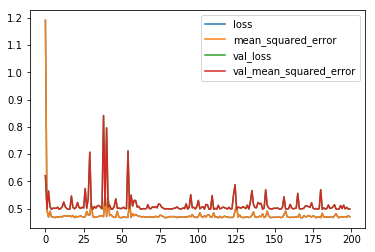

In [17]:
batch_size = 32
epochs = 200

# ネットワークの設定 (線形)
model = Sequential()
model.add(Dense(10, activation='linear', input_shape=(1,)))
model.add(Dense(5, activation='linear'))
model.add(Dense(1, activation='linear'))

# ネットワークの設定 (非線形)
# model = Sequential()
# model.add(Dense(10, activation='sigmoid', input_shape=(1,)))
# model.add(Dense(5, activation='sigmoid'))
# model.add(Dense(1, activation='linear'))


model.summary()
model.compile(loss='mean_squared_error',
              optimizer=SGD(),
              metrics=['mse'])

# 計算
history = model.fit(X_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs,     # エポック数
                    verbose=1,         # ログ出力
                    validation_data=(X_test, y_test))

# 計算過程の描画
pd.DataFrame(history.history).plot()
plt.show()


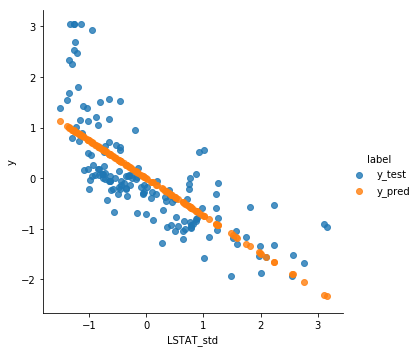

In [18]:
# 予測
y_pred = model.predict(X_test)
df_result["NN"] = y_pred

# 予測結果の描画
df1 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df1["y"] = y_test
df1["label"] = "y_test"
df2 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df2["y"] = y_pred
df2["label"] = "y_pred"
df = pd.concat([df1, df2], axis=0)

sns.lmplot(x="LSTAT_std", y="y", hue="label", data=df, fit_reg=False)
plt.show()


### [演習]
* 中間層の数を2層(ノード数は10と5)に変更してみましょう
* 中間層の活性化関数をsigmoidに変更してみましょう

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Train on 354 samples, validate on 152 samples
Epoch 1/200
354/354 [==============================] - 1s 1ms/step - loss: 1.1154 - mean_squared_error: 1.1154 - val_loss: 1.0019 - val_mean_squared_error: 1.0019
Epoch 2/200
354/354 [==============================] - 0s 78us/step - loss: 0.8545 - mean_squared_error: 0.8545 - val_loss: 0.8943 - val_mean_squared_error: 0.8943
Epoch 3/200
354/354 [==============================] - 0s 75us/step - loss: 0.7812 - mean_squared_error: 0.7812 - val_loss: 0.8542 - val_mean_squared_error: 0.8542
Epoch

Epoch 47/200
354/354 [==============================] - 0s 56us/step - loss: 0.4389 - mean_squared_error: 0.4389 - val_loss: 0.4731 - val_mean_squared_error: 0.4731
Epoch 48/200
354/354 [==============================] - 0s 65us/step - loss: 0.4385 - mean_squared_error: 0.4385 - val_loss: 0.4694 - val_mean_squared_error: 0.4694
Epoch 49/200
354/354 [==============================] - 0s 74us/step - loss: 0.4341 - mean_squared_error: 0.4341 - val_loss: 0.4711 - val_mean_squared_error: 0.4711
Epoch 50/200
354/354 [==============================] - 0s 87us/step - loss: 0.4339 - mean_squared_error: 0.4339 - val_loss: 0.4702 - val_mean_squared_error: 0.4702
Epoch 51/200
354/354 [==============================] - ETA: 0s - loss: 0.4292 - mean_squared_error: 0.42 - 0s 78us/step - loss: 0.4344 - mean_squared_error: 0.4344 - val_loss: 0.4720 - val_mean_squared_error: 0.4720
Epoch 52/200
354/354 [==============================] - 0s 95us/step - loss: 0.4378 - mean_squared_error: 0.4378 - val_loss

354/354 [==============================] - 0s 125us/step - loss: 0.4287 - mean_squared_error: 0.4287 - val_loss: 0.4651 - val_mean_squared_error: 0.4651
Epoch 97/200
354/354 [==============================] - 0s 87us/step - loss: 0.4290 - mean_squared_error: 0.4290 - val_loss: 0.4622 - val_mean_squared_error: 0.4622
Epoch 98/200
354/354 [==============================] - 0s 82us/step - loss: 0.4279 - mean_squared_error: 0.4279 - val_loss: 0.4624 - val_mean_squared_error: 0.4624
Epoch 99/200
354/354 [==============================] - 0s 89us/step - loss: 0.4287 - mean_squared_error: 0.4287 - val_loss: 0.4665 - val_mean_squared_error: 0.4665
Epoch 100/200
354/354 [==============================] - 0s 70us/step - loss: 0.4290 - mean_squared_error: 0.4290 - val_loss: 0.4659 - val_mean_squared_error: 0.4659
Epoch 101/200
354/354 [==============================] - 0s 82us/step - loss: 0.4287 - mean_squared_error: 0.4287 - val_loss: 0.4642 - val_mean_squared_error: 0.4642
Epoch 102/200
354/35

354/354 [==============================] - 0s 102us/step - loss: 0.4229 - mean_squared_error: 0.4229 - val_loss: 0.4571 - val_mean_squared_error: 0.4571
Epoch 146/200
354/354 [==============================] - 0s 147us/step - loss: 0.4230 - mean_squared_error: 0.4230 - val_loss: 0.4569 - val_mean_squared_error: 0.4569
Epoch 147/200
354/354 [==============================] - 0s 111us/step - loss: 0.4249 - mean_squared_error: 0.4249 - val_loss: 0.4576 - val_mean_squared_error: 0.4576
Epoch 148/200
354/354 [==============================] - 0s 134us/step - loss: 0.4222 - mean_squared_error: 0.4222 - val_loss: 0.4566 - val_mean_squared_error: 0.4566
Epoch 149/200
354/354 [==============================] - 0s 81us/step - loss: 0.4250 - mean_squared_error: 0.4250 - val_loss: 0.4549 - val_mean_squared_error: 0.4549
Epoch 150/200
354/354 [==============================] - 0s 100us/step - loss: 0.4224 - mean_squared_error: 0.4224 - val_loss: 0.4555 - val_mean_squared_error: 0.4555
Epoch 151/200

354/354 [==============================] - 0s 51us/step - loss: 0.4186 - mean_squared_error: 0.4186 - val_loss: 0.4528 - val_mean_squared_error: 0.4528
Epoch 195/200
354/354 [==============================] - 0s 72us/step - loss: 0.4179 - mean_squared_error: 0.4179 - val_loss: 0.4513 - val_mean_squared_error: 0.4513
Epoch 196/200
354/354 [==============================] - 0s 50us/step - loss: 0.4186 - mean_squared_error: 0.4186 - val_loss: 0.4517 - val_mean_squared_error: 0.4517
Epoch 197/200
354/354 [==============================] - 0s 49us/step - loss: 0.4176 - mean_squared_error: 0.4176 - val_loss: 0.4528 - val_mean_squared_error: 0.4528
Epoch 198/200
354/354 [==============================] - 0s 53us/step - loss: 0.4170 - mean_squared_error: 0.4170 - val_loss: 0.4506 - val_mean_squared_error: 0.4506
Epoch 199/200
354/354 [==============================] - 0s 52us/step - loss: 0.4166 - mean_squared_error: 0.4166 - val_loss: 0.4514 - val_mean_squared_error: 0.4514
Epoch 200/200
354/

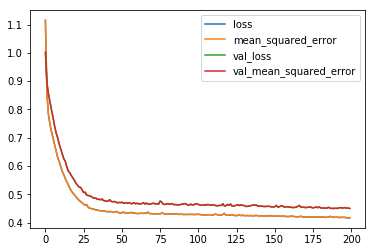

In [19]:
batch_size = 32
epochs = 200

# ネットワークの設定 (線形)
# model = Sequential()
# model.add(Dense(10, activation='linear', input_shape=(1,)))
# model.add(Dense(5, activation='linear'))
# model.add(Dense(1, activation='linear'))

# ネットワークの設定 (非線形)
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(1,)))
# model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='linear'))


model.summary()
model.compile(loss='mean_squared_error',
              optimizer=SGD(),
              metrics=['mse'])

# 計算
history = model.fit(X_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs,     # エポック数
                    verbose=1,         # ログ出力
                    validation_data=(X_test, y_test))

# 計算過程の描画
pd.DataFrame(history.history).plot()
plt.show()


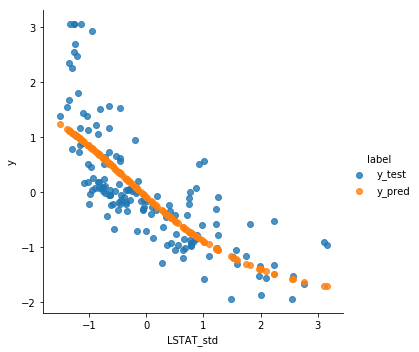

In [20]:
# 予測
y_pred = model.predict(X_test)
df_result["NN"] = y_pred

# 予測結果の描画
df1 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df1["y"] = y_test
df1["label"] = "y_test"
df2 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df2["y"] = y_pred
df2["label"] = "y_pred"
df = pd.concat([df1, df2], axis=0)

sns.lmplot(x="LSTAT_std", y="y", hue="label", data=df, fit_reg=False)
plt.show()
